# Linear regression with one variable, implemented by numpy

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## LOAD DATASET 

In the following data
- X = number of claims
- Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance

dataset from -  http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [3]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

In [5]:
raw_X

array([[108],
       [ 19],
       [ 13],
       [124],
       [ 40],
       [ 57],
       [ 23],
       [ 14],
       [ 45],
       [ 10],
       [  5],
       [ 48],
       [ 11],
       [ 23],
       [  7],
       [  2],
       [ 24],
       [  6],
       [  3],
       [ 23],
       [  6],
       [  9],
       [  9],
       [  3],
       [ 29],
       [  7],
       [  4],
       [ 20],
       [  7],
       [  4],
       [  0],
       [ 25],
       [  6],
       [  5],
       [ 22],
       [ 11],
       [ 61],
       [ 12],
       [  4],
       [ 16],
       [ 13],
       [ 60],
       [ 41],
       [ 37],
       [ 55],
       [ 41],
       [ 11],
       [ 27],
       [  8],
       [  3],
       [ 17],
       [ 13],
       [ 13],
       [ 15],
       [  8],
       [ 29],
       [ 30],
       [ 24],
       [  9],
       [ 31],
       [ 14],
       [ 53],
       [ 26]], dtype=int64)

In [6]:
raw_X.shape, y.shape

((63, 1), (63,))

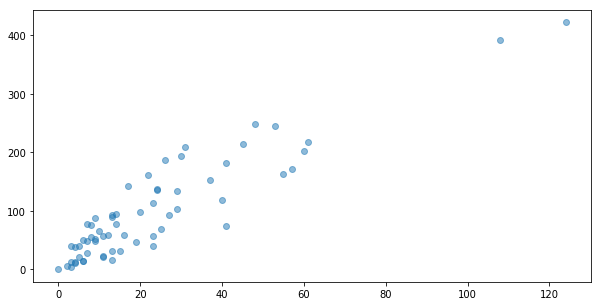

In [12]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [13]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [14]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [7]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [8]:
X.shape

(63, 2)

In [20]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w.reshape(2,)

array([2.56322392, 1.9211693 ])

In [21]:
w.shape

(2,)

NameError: name 'scaling' is not defined

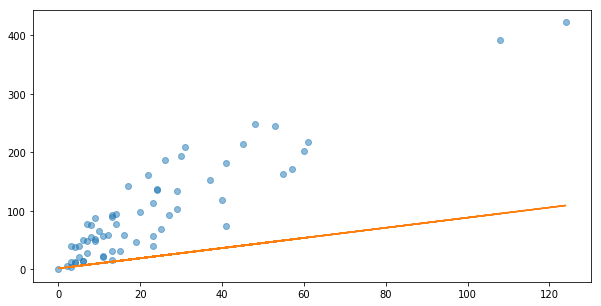

In [19]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)


## HYPOTHESIS AND COST FUNCTION

In [20]:
def hypothesis_function(X, theta):
    return X.dot(theta)
# XW

In [23]:
h = hypothesis_function(X,w)

In [24]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [28]:
h = hypothesis_function(X,w)
cost_function(h, y)

5290.582428261055

## GRADIENT DESCENT

In [58]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

## DO Linear regression with GD

In [75]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87934013  3.41630983]
cost: 625.3743168910943


In [77]:
theta_list[:10]

[[1.864932591429734, 0.8665572922153906],
 [1.9414066719705771, 3.985187691513068],
 [2.0285468094890886, 3.8017507876546164],
 [2.119146137106026, 3.7997945333177308],
 [2.2092885869506635, 3.7978481440555676],
 [2.2989764629837923, 3.7959115701200026],
 [2.388212057547704, 3.7939847620139293],
 [2.4769976514247807, 3.7920676704898475],
 [2.5653355138957834, 3.790160246548604],
 [2.6532279027978602, 3.7882624414381407]]

In [79]:
theta_list = np.array(theta_list)

In [82]:
cost_list[:5]

[5290.582428261055,
 725.2999437138207,
 706.9793721023269,
 706.1583713935556,
 705.3456301544298]

In [87]:
theta_list.transpose().shape

(2, 1001)

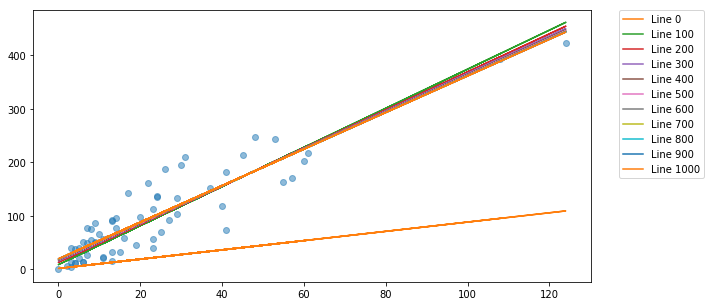

In [88]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

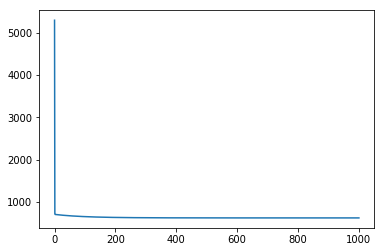

In [89]:
plt.plot(range(len(cost_list)), cost_list);


In [90]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)



In [91]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

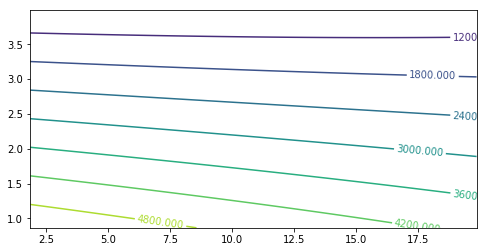

In [94]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [95]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


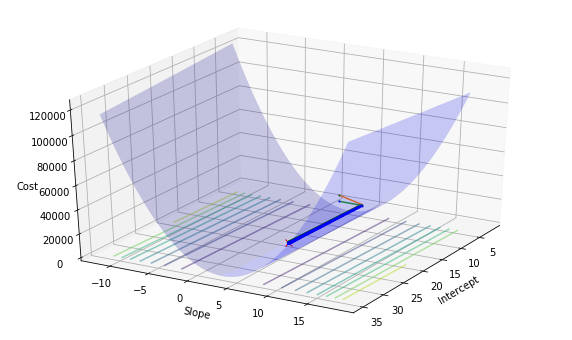

In [96]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);